<a href="https://colab.research.google.com/github/yankeqiang/Datawhale/blob/master/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130824 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&acces

In [0]:
# 指定Google Drive云端硬盘的根目录，名为drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
#指定当前工作路径
import os
os.chdir("drive/Colab Notebooks/DataWhale")

In [0]:
import numpy as np
import pandas as pd

In [5]:
# 导入数据
data = pd.read_csv(r"data2.csv",encoding="gbk")
# 将显示的最大列数设置成100，以展示全部列
pd.set_option("max_columns", 100)
# 抽样查看数据
data.sample(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
3214,8065,1820663,20180507123103034000000388347854,卡号1,0.01,0.99,0,3.59,0.59,0.263,18.0,22.0,21.0,2.0,NaN,6560,0,20.0,20150505.0,90190,106.0,0.45,12830,8.0,600,0.10,1120,0.50,一线城市,6.0,22.0,6.0,22.0,0.0,0.0,2.0,2.0,929797.0,1010,2.0,0.0,500,13200,0.0,0,xs,1112.0,82.0,赖志发,677.0,74.0,8.0,5.0,3.0,14.0,2018-04-24,2.0,8.0,12.0,663.0,76.0,32.0,30.0,0.0,11.0,1.0,10.0,3.0,5.0,11.0,30.0,2.0,3.0,0.0,340.0,2018-05-06,1800.0,76.0,10.0,13.0,2300.0,1420.0,13800.0,87.0,1.0,1.0,13800.0,13800.0,13.0,1.0
1014,2644,640663,20180507120224286000000388235138,卡号1,0.04,0.96,3670,1.65,0.84,0.597,20.0,25.0,13.0,2.0,1.0,27240,0,27.0,20150704.0,307980,312.0,0.60,38340,6.0,4370,0.15,1020,0.55,三线城市,8.0,25.0,9.0,25.0,0.0,5.0,12.0,12.0,534.0,600,10.0,0.0,230,8080,0.0,0,xs,1052.0,82.0,黄沃祥,553.0,76.0,33.0,18.0,10.0,43.0,2018-04-30,9.0,29.0,34.0,496.0,75.0,61.0,53.0,12.0,19.0,3.0,16.0,1.0,3.0,24.0,67.0,56.0,1.0,1.0,338.0,2018-04-19,2200.0,76.0,16.0,16.0,4100.0,1943.0,3300.0,78.0,3.0,3.0,3600.0,2333.0,7.0,18.0
4694,11855,359742,20180507123100305000000388347815,卡号1,0.03,0.97,0,0.12,0.88,0.150,13.0,30.0,23.0,4.0,NaN,12480,0,15.0,20161022.0,62530,60.0,0.40,19640,7.0,2240,0.15,970,0.55,一线城市,7.0,17.0,7.0,17.0,0.0,2.0,4.0,4.0,86.0,860,4.0,0.0,0,0,0.0,1,xs,576.0,86.0,胡海洋,542.0,81.0,8.0,4.0,2.0,12.0,2018-04-09,1.0,4.0,8.0,491.0,77.0,29.0,18.0,1.0,7.0,4.0,3.0,1.0,10.0,22.0,24.0,41.0,1.0,7.0,356.0,2018-05-02,1100.0,74.0,3.0,3.0,1600.0,1200.0,2900.0,80.0,4.0,4.0,7200.0,3550.0,28.0,5.0
2680,6694,2789389,20180507115852185000000388221029,卡号1,0.12,0.88,900,0.05,0.82,0.218,15.0,15.0,15.0,3.0,NaN,12600,0,14.0,20161021.0,57790,75.0,0.60,15220,6.0,660,0.65,810,0.60,三线城市,8.0,15.0,2.0,15.0,0.0,5.0,5.0,5.0,131476.0,760,2.0,0.0,0,13740,0.0,0,xs,577.0,87.0,吴开兰,522.0,81.0,12.0,3.0,2.0,15.0,2018-04-19,7.0,10.0,11.0,497.0,73.0,26.0,23.0,3.0,8.0,3.0,5.0,0.0,3.0,12.0,26.0,18.0,0.0,1.0,324.0,2018-03-28,1100.0,74.0,5.0,5.0,2300.0,1520.0,6900.0,76.0,3.0,3.0,8400.0,7100.0,18.0,40.0
2471,6214,2762688,20180507123051208000000388351232,卡号1,0.01

In [6]:
data.drop(columns=["trade_no","bank_card_no","id_name","source"], axis=1, inplace=True)
data.select_dtypes(include="object").columns

Index(['reg_preference_for_trad', 'latest_query_time', 'loans_latest_time'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["reg_preference_for_trad"] = lb.fit_transform(data["reg_preference_for_trad"].astype(str))
data["reg_preference_for_trad"].value_counts()

1    3403
2    1064
5     150
3     131
4       4
0       2
Name: reg_preference_for_trad, dtype: int64

In [0]:
data['latest_query_time'] = (pd.to_datetime(data['latest_query_time']) - pd.to_datetime('today')).apply(lambda col: col.days)
data['loans_latest_time'] = (pd.to_datetime(data['loans_latest_time']) - pd.to_datetime('today')).apply(lambda col: col.days)

In [0]:
# Unnamed: 0 为序号需要删除，custid为用户id需要删除
data.drop(columns=["Unnamed: 0","custid"], axis=1, inplace=True)

In [10]:
data.isnull().sum().argmax()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'student_feature'

In [0]:
data["student_feature"].fillna(value=0,inplace=True)

In [12]:
def desc(df):
    loss_num=[] #缺失值的数量
    valid_num=[] #非缺失值的数量
    unique_num=[] #唯一的数量
    unique_percent=[] #唯一率
    for i,j in enumerate (df.columns): # enumerator 函数可以同时获得索引和值。 i表示索引，j表示值
        loss_num.append(df[df[j].isnull()].shape[0]) #isnull() 表示的是空 返回的是True（空）
        valid_num.append(df[df[j].notnull()].shape[0])
        unique_num.append(len(df[j].unique()))
        unique_percent.append(len(df[df[j].notnull()][j].unique())/df[df[j].notnull()].shape[0])
    data_desc = pd.DataFrame({"loss_num":loss_num,"valid_num":valid_num,"unique_num":unique_num,"unique_percent":unique_percent},index=df.columns)
    return data_desc
data_count = desc(data)
data_count

,loss_num,valid_num,unique_num,unique_percent
low_volume_percent,2,4752,41,0.008418
middle_volume_percent,2,4752,91,0.018939
take_amount_in_later_12_month_highest,0,4754,166,0.034918
trans_amount_increase_rate_lately,3,4751,783,0.164597
trans_activity_month,2,4752,85,0.017677
trans_activity_day,2,4752,513,0.107744
transd_mcc,2,4752,42,0.008628
trans_days_interval_filter,8,4746,148,0.030973
trans_days_interval,2,4752,115,0.023990
regional_mobility,2,4752,6,0.001052


In [13]:
display(data.shape)
data.dropna(thresh=49,inplace=True)
# data.info()
data["status"].isnull().any()
display(data.shape)
data.isnull().sum(axis=1).value_counts()

(4754, 84)

(4476, 84)

0     3983
1      385
2       37
11      22
31      12
30       8
3        7
4        7
12       5
10       3
5        3
15       1
6        1
13       1
32       1
dtype: int64

In [0]:
data["cross_consume_count_last_1_month"].fillna(value=0,inplace=True)

In [0]:
data.fillna(data.mean(),inplace=True)

In [16]:
data.drop(data.columns[data.std()==0],axis=1,inplace=True)
data.shape

(4476, 84)

In [0]:
y = data["status"]
data.drop(["status"], axis=1, inplace=True)
x = data

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2018)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(3133, 83)

(1343, 83)

(3133,)

(1343,)

1.对数据进行标准化处理

In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

利用accuracy、precision, recall和F1-score，auc值对模型进行评分，并绘制ROC曲线

In [0]:
#引入要用到的评价函数
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [0]:
#得分和ROC曲线绘制  参考20同学的脚本
def get_scores(y_true, y_predicet, y_predict_pro):
    acc_score = accuracy_score(y_true,y_predicet)
    pre_score = precision_score(y_true,y_predicet)
    recall = recall_score(y_true,y_predicet)
    F1 = f1_score(y_true,y_predicet)
    auc_score = roc_auc_score(y_true,y_predict_pro)#直接求AUC值
    fpr, tpr, thresholds = roc_curve(y_test,y_predict_pro)#求ROC
    plt.plot(fpr,tpr,'b',label='AUC = %0.4f'% auc_score)
    plt.plot([0,1],[0,1],'r--',label= 'Random guess')
    plt.legend(loc='lower right')
    plt.title('ROCcurve')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()
    print('准确率：',acc_score)
    print('精确率：',pre_score)
    print('召回率：',recall)
    print('F1-score:',F1)
    print('AUC',auc_score)

利用逻辑回归进行分析

In [27]:
#调参
from sklearn.metrics import classification_report, accuracy_score, roc_curve
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
parameters = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
GS = GridSearchCV(lr, param_grid = parameters, cv=5)
GS.fit(x_train_sc,y_train)
print(GS.best_params_)
y_pre = GS.predict(x_test_sc)
display(accuracy_score(y_pre, y_test))
print(classification_report(y_pre, y_test))

{'C': 0.1, 'penalty': 'l1'}


0.8004467609828742

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1185
           1       0.34      0.75      0.47       158

    accuracy                           0.80      1343
   macro avg       0.65      0.78      0.67      1343
weighted avg       0.89      0.80      0.83      1343



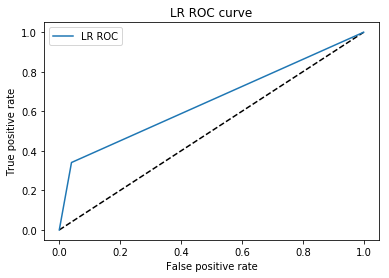

In [28]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_lr, tpr_lr, _  = roc_curve(y_test, y_pre)
plt.plot(fpr_lr, tpr_lr, label='LR ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR ROC curve')
plt.legend(loc='best')
plt.show()

利用SVM进行分类

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc_parameters = {'kernel':['linear','poly','rbf','sigmoid'],"C":[0.001,0.01,0.1,1,10,100]}
svc_gridsearch = GridSearchCV(svc,param_grid = svc_parameters,cv=5)
svc_gridsearch.fit(x_train_sc,y_train)
print(svc_gridsearch.best_params_)


{'C': 1, 'kernel': 'linear'}


In [34]:
y_pre_svc = svc_gridsearch.predict(x_test_sc)
display(accuracy_score(y_pre_svc, y_test))
print(classification_report(y_pre_svc, y_test))


0.7877885331347729

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1228
           1       0.25      0.77      0.38       115

    accuracy                           0.79      1343
   macro avg       0.61      0.78      0.63      1343
weighted avg       0.91      0.79      0.83      1343



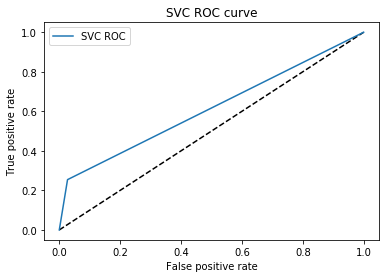

In [35]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_svc, tpr_svc, _  = roc_curve(y_test, y_pre_svc)
plt.plot(fpr_svc, tpr_svc, label='SVC ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC ROC curve')
plt.legend(loc='best')
plt.show()

利用决策树进行分类

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_parameters = {'criterion':['gini','entropy'],'max_depth':range(1,100)}
dtc_gridsearch = GridSearchCV(dtc,param_grid=dtc_parameters,cv=5)
dtc_gridsearch.fit(x_train_sc, y_train)
print(dtc_gridsearch.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [39]:
dtc_gridsearch.fit(x_train_sc,y_train)
y_pre_dtc = dtc_gridsearch.predict(x_test_sc)
display(accuracy_score(y_pre_dtc,y_test))
print(classification_report(y_pre_dtc,y_test))

0.7714072970960536

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1226
           1       0.23      0.67      0.34       117

    accuracy                           0.77      1343
   macro avg       0.59      0.72      0.60      1343
weighted avg       0.90      0.77      0.82      1343



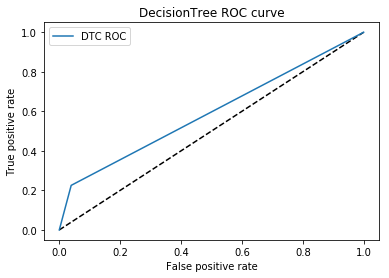

In [40]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_dtc, tpr_dtc, _  = roc_curve(y_test, y_pre_dtc)
plt.plot(fpr_dtc, tpr_dtc, label='DTC ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTree ROC curve')
plt.legend(loc='best')
plt.show()

利用随机森林进行分类

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_parameters = {'criterion':['gini','entropy'],'max_depth':range(1,100)}
rf_gridsearch = GridSearchCV(rf,param_grid=rf_parameters,cv=5)
rf_gridsearch.fit(x_train_sc,y_train)
print(rf_gridsearch.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [42]:
rf_gridsearch.fit(x_train_sc, y_train)
y_pre_rf = rf_gridsearch.predict(x_test_sc)
display(accuracy_score(y_pre_rf,y_test))
print(classification_report(y_pre_rf,y_test))

0.7617274758004468

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1187
           1       0.26      0.58      0.36       156

    accuracy                           0.76      1343
   macro avg       0.60      0.68      0.61      1343
weighted avg       0.86      0.76      0.80      1343



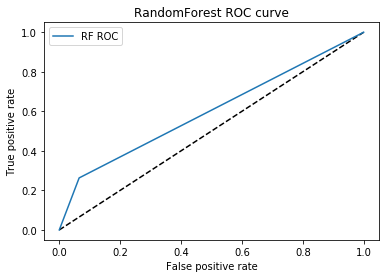

In [43]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_rf, tpr_rf, _  = roc_curve(y_test, y_pre_rf)
plt.plot(fpr_rf, tpr_rf, label='RF ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForest ROC curve')
plt.legend(loc='best')
plt.show()

利用XGBoost进行分类

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_parameters = {'max_depth':range(3,10,2),
                 'min_child_weight':range(1,6,2)}
xgb_gridsearch = GridSearchCV(xgb,param_grid=xgb_parameters,cv=5)
xgb_gridsearch.fit(x_train_sc,y_train)
print(xgb_gridsearch.best_params_)

{'max_depth': 3, 'min_child_weight': 3}


In [45]:
xgb_gridsearch.fit(x_train_sc,y_train)
y_pre_xgb = xgb_gridsearch.predict(x_test_sc)
display(accuracy_score(y_pre_xgb,y_test))
print(classification_report(y_pre_xgb,y_test))

0.7915115413253909

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1219
           1       0.27      0.77      0.40       124

    accuracy                           0.79      1343
   macro avg       0.62      0.78      0.64      1343
weighted avg       0.91      0.79      0.83      1343



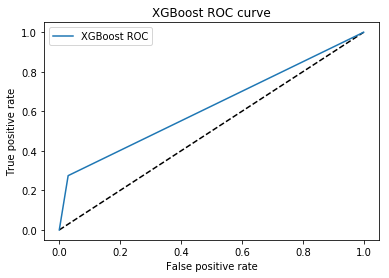

In [46]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_xgb, tpr_xgb, _  = roc_curve(y_test, y_pre_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc='best')
plt.show()

**模型融合**

利用Stacking进行模型融合，选择评分最高的逻辑回归模型作为基准模型，和其他模型进行融合，得到最终的模型及评分结果

In [0]:
from mlxtend.classifier import StackingClassifier
lr_1 = LogisticRegression(C=0.1,penalty='l1')
dtc_2 = DecisionTreeClassifier(criterion='gini',max_depth=4)
rf_3 = RandomForestClassifier(criterion='entropy',max_depth=4)
xgb_4 = XGBClassifier(max_depth=3,min_child_weight=3)
svc_5 = SVC(kernel = 'linear',C=1)
sclf = StackingClassifier(classifiers=[dtc_2,rf_3,xgb_4,svc_5],meta_classifier=lr_1)

In [55]:
sclf.fit(x_train_sc,y_train)
y_pre_stacking = sclf.predict(x_test_sc)
display(accuracy_score(y_pre_stacking, y_test))
print(classification_report(y_pre_stacking, y_test))

0.7915115413253909

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1219
           1       0.27      0.77      0.40       124

    accuracy                           0.79      1343
   macro avg       0.62      0.78      0.64      1343
weighted avg       0.91      0.79      0.83      1343



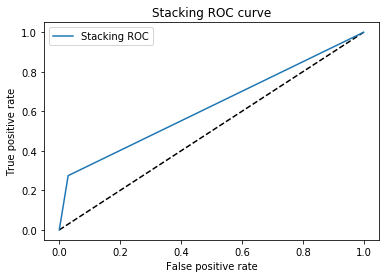

In [56]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_stacking, tpr_stacking, _  = roc_curve(y_test, y_pre_stacking)
plt.plot(fpr_stacking, tpr_stacking, label='Stacking ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Stacking ROC curve')
plt.legend(loc='best')
plt.show()

In [58]:
from xgboost import XGBClassifier as XGBC
parameters = {'booster':["gbtree","gblinear","dart"],
              'reg_alpha':[0,0.1,0.5,1.0],
              'gamma':[0,0.05,0.1,0.3,0.5],
              'learning_rate':[0.01,0.015,0.025,0.05,0.1]}
xgbc = XGBC(cache_size = 5000).fit(x_train_sc,y_train)
GS = GridSearchCV(xgbc, parameters, cv=5)
GS.fit(x_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     cache_size=5000, colsample_bylevel=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 0.05, 0.1, 0.3, 0.5],
                         'learning_rate': [0.01, 0.015,